## Demand Spread for Parks & Recreation of City of Lawrence -Eswar Hemant Majeti_G233R756

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_2013 = pd.read_csv("Stephen_Mason_Facility Reservations 2013.csv")
data_2014 = pd.read_csv("Stephen_Mason_Facility Reservations 2014.csv")
data_2015 = pd.read_csv("Stephen_Mason_Facility Reservations 2015.csv")
data_2016 = pd.read_csv("Stephen_Mason_Facility Reservations 2016.csv")
data_2017 = pd.read_csv("Stephen_Mason_Facility Reservations 2017.csv")
data_2018 = pd.read_csv("Stephen_Mason_Facility Reservations 2018.csv")
data_2019 = pd.read_csv("Stephen_Mason_Facility Reservations 2019.csv")
data_2020 = pd.read_csv("Stephen_Mason_Facility Reservations 2020.csv")
data_2021 = pd.read_csv("Stephen_Mason_Facility Reservations 2021.csv")
data_2022 = pd.read_csv("Stephen_Mason_Facility Reservations 2022.csv")
merged_data = pd.concat([data_2013, data_2014, data_2015, data_2016, data_2017, data_2018,
                         data_2019, data_2020, data_2021, data_2022])
data=pd.concat([data_2013, data_2014, data_2015, data_2016, data_2017, data_2018,
                         data_2019, data_2020, data_2021, data_2022])

## Multiple Booking

In [3]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123649 entries, 0 to 12884
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Facility Class     123649 non-null  object
 1   Facility Location  123649 non-null  object
 2   Facility Code      123649 non-null  object
 3   Facility           123649 non-null  object
 4   Status             123649 non-null  object
 5   Reservation Type   123649 non-null  object
 6   BeginTime          123649 non-null  object
 7   EndTime            123649 non-null  object
 8   Begin Date         123649 non-null  object
 9   End Date           123649 non-null  object
 10  Headcount          123649 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 11.3+ MB


In [4]:
current_max_index = merged_data.index.max()
new_index_range = range(0, len(merged_data))
merged_data = merged_data.set_index(pd.Index(new_index_range))

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123649 entries, 0 to 123648
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Facility Class     123649 non-null  object
 1   Facility Location  123649 non-null  object
 2   Facility Code      123649 non-null  object
 3   Facility           123649 non-null  object
 4   Status             123649 non-null  object
 5   Reservation Type   123649 non-null  object
 6   BeginTime          123649 non-null  object
 7   EndTime            123649 non-null  object
 8   Begin Date         123649 non-null  object
 9   End Date           123649 non-null  object
 10  Headcount          123649 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 10.4+ MB


In [5]:
print(merged_data.columns)
merged_data.isnull().sum()

Index(['Facility Class', 'Facility Location', 'Facility Code', 'Facility',
       'Status', 'Reservation Type', 'BeginTime', 'EndTime', 'Begin Date',
       'End Date', 'Headcount'],
      dtype='object')


Facility Class       0
Facility Location    0
Facility Code        0
Facility             0
Status               0
Reservation Type     0
BeginTime            0
EndTime              0
Begin Date           0
End Date             0
Headcount            0
dtype: int64

In [6]:
merged_data.head(100)

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,BeginTime,EndTime,Begin Date,End Date,Headcount
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,1/6/2013,1/6/2013,100
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,5:00pm,11:00pm,1/6/2013,1/6/2013,100
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/7/2013,1/7/2013,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/9/2013,1/9/2013,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,7:00pm,8:15pm,1/9/2013,1/9/2013,0
...,...,...,...,...,...,...,...,...,...,...,...
95,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,1:00pm,3/24/2013,3/24/2013,100
96,BDMUL,CARN,EGAL,East Gallery Room,Firm,Facility,6:30pm,7:30pm,3/25/2013,3/25/2013,25
97,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:30pm,8:00pm,3/25/2013,3/25/2013,0
98,BDCON,CARN,CONF,Conference Room,Firm,Activity,7:00pm,8:00pm,3/25/2013,3/25/2013,0


In [7]:
merged_data.rename(columns={"Facility Class": "Class", "Facility Location": "Location", "Facility Code": "Code",
                            "Begin Date": "Date", "Reservation Type": "ReservationType"},
                   inplace=True)
merged_data.head(10)


,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,1/6/2013,1/6/2013,100
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,5:00pm,11:00pm,1/6/2013,1/6/2013,100
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/7/2013,1/7/2013,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/9/2013,1/9/2013,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,7:00pm,8:15pm,1/9/2013,1/9/2013,0
5,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:00pm,7:15pm,1/10/2013,1/10/2013,0
6,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,1/13/2013,1/13/2013,100
7,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/14/2013,1/14/2013,0
8,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:30pm,8:00pm,1/14/2013,1/14/2013,0
9,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/16/2013,1/16/2013,0


In [8]:

total_rows = merged_data.shape[0]

print(f"Total number of rows: {total_rows}")

Total number of rows: 123649


In [9]:
count_zero_headcount = merged_data[merged_data['Headcount'] == 0].shape[0]

print(f"Number of rows with headcount 0: {count_zero_headcount}")

Number of rows with headcount 0: 62730


In [10]:
count_non_zero_headcount = (merged_data['Headcount'] != 0).sum()

print(f"Number of rows with non-zero headcount: {count_non_zero_headcount}")

Number of rows with non-zero headcount: 60919


In [11]:

merged_data['Date'] = pd.to_datetime(merged_data['Date'])



In [12]:
merged_data.isnull().sum()

Class              0
Location           0
Code               0
Facility           0
Status             0
ReservationType    0
BeginTime          0
EndTime            0
Date               0
End Date           0
Headcount          0
dtype: int64

In [13]:
merged_data.head(10)

,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,2013-01-06,1/6/2013,100
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,5:00pm,11:00pm,2013-01-06,1/6/2013,100
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,2013-01-07,1/7/2013,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,2013-01-09,1/9/2013,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,7:00pm,8:15pm,2013-01-09,1/9/2013,0
5,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:00pm,7:15pm,2013-01-10,1/10/2013,0
6,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,2013-01-13,1/13/2013,100
7,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,2013-01-14,1/14/2013,0
8,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:30pm,8:00pm,2013-01-14,1/14/2013,0
9,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,2013-01-16,1/16/2013,0


In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123649 entries, 0 to 123648
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Class            123649 non-null  object        
 1   Location         123649 non-null  object        
 2   Code             123649 non-null  object        
 3   Facility         123649 non-null  object        
 4   Status           123649 non-null  object        
 5   ReservationType  123649 non-null  object        
 6   BeginTime        123649 non-null  object        
 7   EndTime          123649 non-null  object        
 8   Date             123649 non-null  datetime64[ns]
 9   End Date         123649 non-null  object        
 10  Headcount        123649 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 10.4+ MB


In [15]:
merged_data.sort_values(by=['Date', 'Location', 'Class'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data.head(20)


,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-01,1/1/2013,20
1,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,0
2,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-02,1/2/2013,0
3,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Activity,5:00pm,10:00pm,2013-01-02,1/2/2013,0
4,BDMUL,DEPOT,CMRM,Community Room,Firm,Facility,4:00pm,8:00pm,2013-01-02,1/2/2013,25
5,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,25
6,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Activity,6:00pm,9:00pm,2013-01-02,1/2/2013,0
7,BDGYM,HPC,HPGYM,HPC Gymnasium,Firm,Activity,7:00pm,10:00pm,2013-01-02,1/2/2013,0
8,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-03,1/3/2013,0
9,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,3:45pm,5:45pm,2013-01-03,1/3/2013,0


In [16]:
# Group by 'Location' and collect unique facilities in each location
facilities_by_location = merged_data.groupby('Location')['Facility'].unique()

# Print the count and facilities in each location
for location, facilities in facilities_by_location.items():
    count = len(facilities)
    print(f"Location: {location}, Count: {count}")
    print("Facilities:")
    for facility in facilities:
        print(f"- {facility}")
    print("\n")


Location: CARN, Count: 5
Facilities:
- Entire Facility
- Heritage Room l
- Conference Room
- East Gallery Room
- Front Lawn


Location: CB, Count: 13
Facilities:
- CB Gymnasium
- Community Room 2
- Training Rm (CRM 3)
- Community Room 1&2
- Dance Studio
- Community Room 1
- Conference Room
- Art Room
- CB North Court 1
- Weight Room
- CB South Court 2
- CB Front Stairs
- Entire Community Bld


Location: DEPOT, Count: 4
Facilities:
- Community Room
- Entire Depot
- Theater Room
- Garden


Location: ELC, Count: 7
Facilities:
- ELC Gymnasium
- Meeting Room
- ELC GYM Court 2
- Gymnastics Room
- ELC GYM Court 1
- BDay Gymnastics Pkg
- Entire ELC


Location: HPC, Count: 9
Facilities:
- HPC Gymnasium
- HPC South Court 1
- HPC North Court 2
- North Bly Room
- South Bly Room
- Bly Room
- Weight Room
- HPC Entire Facility
- Racquet Ball Court


Location: SPL, Count: 42
Facilities:
- Turf Half Field #1
- Gymnastics Room
- Court 7
- Court 8
- Court 1
- Court 6
- Champions Room
- Court 4
- Court 5


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X_rf = merged_data.drop('Headcount', axis=1)
y_rf = merged_data['Headcount']

encoder_rf = OneHotEncoder(sparse=True)
X_rf_encoded = encoder_rf.fit_transform(X_rf.select_dtypes(include=['object']))

label_encoder_rf = LabelEncoder()
X_rf_label_encoded = X_rf.apply(label_encoder_rf.fit_transform)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf_label_encoded, y_rf, test_size=0.3,
                                                                random_state=42)

random_forest = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
random_forest.fit(X_rf_train, y_rf_train)

y_rf_pred = random_forest.predict(X_rf_test)
mse_rf = mean_squared_error(y_rf_test, y_rf_pred)
Predicted_values=y_rf_pred
print("MSE:", mse_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE:", rmse_rf)
mae_rf = mean_absolute_error(y_rf_test, y_rf_pred)
print("MAE:", mae_rf)
r2_rf = r2_score(y_rf_test, y_rf_pred)
print("R-squared:", r2_rf)


MSE: 26664.64674708721
RMSE: 163.29313135305847
MAE: 8.220079255964416
R-squared: 0.6620009916788824


In [18]:
print(Predicted_values.astype(int))

[0 0 0 ... 0 0 0]


In [19]:
print(Predicted_values.size)

37095


In [20]:
print(Predicted_values[:100].astype(int))

[  0   0   0   0   0  20  12  15  13   0   0  25   0   0   0   7   6 500
  10   0   0  75  14   0   0   0  19   4  41  10  16  10  58   0   0   0
   2   0  25   0   5   0   0  40   0  17  31   0  21  25   0 512  15   0
   0   2   0   0  30   0   0   0  20  15   0   0  50  20   0  90   0  25
  11  15   0  15  25  21   0   0  25  12   0   0  20   0   9   0  35  65
  15   0   8   0 146   0   0   1  15   0]


In [21]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

X_gb = merged_data.drop('Headcount', axis=1)
y_gb = merged_data['Headcount']

label_encoder_gb = LabelEncoder()
X_gb_label_encoded = X_gb.apply(label_encoder_gb.fit_transform)

encoder_gb = OneHotEncoder()
X_gb_one_hot_encoded = encoder_gb.fit_transform(X_gb.select_dtypes(include=['object']))

X_gb_train, X_gb_test, y_gb_train, y_gb_test = train_test_split(X_gb_one_hot_encoded, y_gb, test_size=0.3,
                                                                random_state=42)

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_gb_train, y_gb_train)

y_gb_pred = gradient_boosting.predict(X_gb_test)
Predicted_values_gb=y_gb_pred

# Calculate MSE, RMSE, MAE & R-Squared
mse_gb = mean_squared_error(y_gb_test, y_gb_pred)
print("MSE:", mse_gb)
rmse_gb = np.sqrt(mse_gb)
print("RSME:", rmse_gb)
mae_gb = mean_absolute_error(y_gb_test, y_gb_pred)
print("MAE:", mae_gb)
r2_gb = r2_score(y_gb_test, y_gb_pred)
print("R-Squared:", r2_gb)

MSE: 53264.24005341161
RSME: 230.79046785647714
MAE: 28.834526212050804
R-Squared: 0.32482659576213146


In [22]:
print(Predicted_values_gb.astype(int))

[12 12 16 ...  8 12  8]


In [23]:
print(Predicted_values_gb.size)

37095


In [24]:
print(Predicted_values_gb[:100].astype(int))

[ 12  12  16  13  16  13  16  16  16  16   8  16  20  52  12  16  16  84
  13  19  26  84  16  12  16   8  19  16  12  16  13  16  16   8  16  16
  13   8  16  84  13   8  16  16  79  16  19   8  16  16  12  84  16   8
 107  16  16  13  16  13   8  26  16  16   8  11  19  16  13  13  16  16
  16  16  13  16  16  16  13  13  16  16   8   8  13  72  16  12  19  22
  13  12  13  19  13  26  12  48  16  13]


In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

X_dt = merged_data.drop('Headcount', axis=1)
y_dt = merged_data['Headcount']

label_encoder_dt = LabelEncoder()
X_dt_label_encoded = X_dt.apply(label_encoder_dt.fit_transform)

encoder_dt = OneHotEncoder()
X_dt_one_hot_encoded = encoder_dt.fit_transform(X_dt.select_dtypes(include=['object']))

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt_one_hot_encoded, y_dt, test_size=0.3,
                                                                random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_dt_train, y_dt_train)

y_dt_pred = decision_tree.predict(X_dt_test)
Predicted_values_dt=y_dt_pred
mse_dt = mean_squared_error(y_dt_test, y_dt_pred)
print("MSE:", mse_dt)
rmse_dt = np.sqrt(mse_dt)
print("RSME:", rmse_dt)
mae_dt = mean_absolute_error(y_dt_test, y_dt_pred)
print("MAE:", mae_dt)
r2_dt = r2_score(y_dt_test, y_dt_pred)
print("R-Squared:", r2_dt)


MSE: 28355.753794311902
RSME: 168.39166782923644
MAE: 7.723817226041246
R-Squared: 0.640564649005817


In [26]:
print(Predicted_values_dt.astype(int))

[0 0 0 ... 0 0 0]


In [27]:
print(Predicted_values_dt.size)

37095


In [28]:
print(Predicted_values_dt[:100].astype(int))

[  0   0   0   2   0  20  16  15   0   0   0  25   0   0   0   8   6 500
   0   0   0  75  15   0   0   0  15   0   0  12   0  15 100   0   0   0
  10   0  25   0  16   0   0  40   0   0  23   0  21  25   0 500  15   0
   0   9   0   0  30   0   0   0  20  30   0   0  50  20   0 150   0  25
  20  15   0  15  25   0   0   0  25  12   0   0  20   0   9   0  50  59
  15   0   0   0 150   0   0   0  15   0]


In [29]:
# Facilities in ELC
facilities_elc = set(merged_data[merged_data['Location'] == 'ELC']['Facility'].unique())

# Facilities in SPL
facilities_spl = set(merged_data[merged_data['Location'] == 'SPL']['Facility'].unique())

# Common Facilities
common_facilities = facilities_elc.intersection(facilities_spl)

print("Common Facilities between ELC and SPL:")
for facility in common_facilities:
    print(f"- {facility}")

Common Facilities between ELC and SPL:
- Gymnastics Room


In [30]:
# Facilities in HPC
facilities_elc = set(merged_data[merged_data['Location'] == 'HPC']['Facility'].unique())

# Facilities in CB
facilities_spl = set(merged_data[merged_data['Location'] == 'CB']['Facility'].unique())

# Common Facilities
common_facilities = facilities_elc.intersection(facilities_spl)

print("Common Facilities between HPC and CB:")
for facility in common_facilities:
    print(f"- {facility}")

Common Facilities between HPC and CB:
- Weight Room


In [31]:
# Facilities in CARN
facilities_elc = set(merged_data[merged_data['Location'] == 'CARN']['Facility'].unique())

# Facilities in CB
facilities_spl = set(merged_data[merged_data['Location'] == 'CB']['Facility'].unique())

# Common Facilities
common_facilities = facilities_elc.intersection(facilities_spl)

print("Common Facilities between CARN and CB:")
for facility in common_facilities:
    print(f"- {facility}")

Common Facilities between CARN and CB:
- Conference Room


## Single Booking per Day

In [32]:
data.rename(columns={"Begin Date": "Date", "Facility Class": "Class", "Facility Location": "Location", "Facility Code": "Code","Reservation Type": "ReservationType"},
                   inplace=True)

In [33]:
# Aggregate data to have a single entry per day
daily_data = data.groupby(['Date','Location', 'Class','Facility','Status', 'ReservationType', 'Code','Headcount']).size().reset_index(name='count')

In [34]:
data.head(10)

,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,1/6/2013,1/6/2013,100
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,5:00pm,11:00pm,1/6/2013,1/6/2013,100
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/7/2013,1/7/2013,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/9/2013,1/9/2013,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,7:00pm,8:15pm,1/9/2013,1/9/2013,0
5,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:00pm,7:15pm,1/10/2013,1/10/2013,0
6,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00am,12:30pm,1/13/2013,1/13/2013,100
7,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/14/2013,1/14/2013,0
8,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,6:30pm,8:00pm,1/14/2013,1/14/2013,0
9,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,5:30pm,6:25pm,1/16/2013,1/16/2013,0


In [35]:
daily_data.head(10)

,Date,Location,Class,Facility,Status,ReservationType,Code,Headcount,count
0,1/1/2013,ELC,BDGYM,ELC Gymnasium,Firm,Facility,ELGYM,20,1
1,1/1/2014,CB,BDGYM,CB Gymnasium,Firm,Facility,CBGYM,15,1
2,1/1/2014,HPC,BDEF,HPC Entire Facility,Firm,Activity,HPCEF,0,1
3,1/1/2015,CARN,BDMUL,Heritage Room l,Firm,Facility,HRTG,100,1
4,1/1/2015,CB,BDGYM,CB Gymnasium,Firm,Facility,CBGYM,25,1
5,1/1/2015,CB,BDGYM,CB Gymnasium,Firm,Facility,CBGYM,50,1
6,1/1/2015,ELC,BDGYM,ELC Gymnasium,Firm,Facility,ELGYM,20,1
7,1/1/2015,ELC,BDGYM,ELC Gymnasium,Firm,Facility,ELGYM,25,1
8,1/1/2015,HPC,BDGYM,HPC Gymnasium,Firm,Facility,HPGYM,25,1
9,1/1/2015,HPC,BDGYM,HPC Gymnasium,Firm,Facility,HPGYM,50,1


In [36]:
merged_data.head(10)

,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-01,1/1/2013,20
1,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,0
2,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-02,1/2/2013,0
3,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Activity,5:00pm,10:00pm,2013-01-02,1/2/2013,0
4,BDMUL,DEPOT,CMRM,Community Room,Firm,Facility,4:00pm,8:00pm,2013-01-02,1/2/2013,25
5,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,25
6,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Activity,6:00pm,9:00pm,2013-01-02,1/2/2013,0
7,BDGYM,HPC,HPGYM,HPC Gymnasium,Firm,Activity,7:00pm,10:00pm,2013-01-02,1/2/2013,0
8,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-03,1/3/2013,0
9,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,3:45pm,5:45pm,2013-01-03,1/3/2013,0


In [37]:

#Single booking per day
daily_data_one = daily_data[daily_data['count'] == 1]
Single_Booking = daily_data_one.groupby('Date').first().reset_index()
# Display the new dataframe


In [38]:
Single_Booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             3646 non-null   object
 1   Location         3646 non-null   object
 2   Class            3646 non-null   object
 3   Facility         3646 non-null   object
 4   Status           3646 non-null   object
 5   ReservationType  3646 non-null   object
 6   Code             3646 non-null   object
 7   Headcount        3646 non-null   int64 
 8   count            3646 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 256.5+ KB


In [39]:
# Group by 'Location' and collect unique facilities in each location
facilities_by_location = Single_Booking.groupby('Location')['Facility'].unique()

# Print the count and facilities in each location
for location, facilities in facilities_by_location.items():
    count = len(facilities)
    print(f"Location: {location}, Count: {count}")
    print("Facilities:")
    for facility in facilities:
        print(f"- {facility}")
    print("\n")


Location: CARN, Count: 5
Facilities:
- Heritage Room l
- Entire Facility
- Conference Room
- East Gallery Room
- Front Lawn


Location: CB, Count: 9
Facilities:
- CB Gymnasium
- Dance Studio
- Conference Room
- Community Room 1
- Community Room 2
- Art Room
- Community Room 1&2
- CB Front Stairs
- Training Rm (CRM 3)


Location: DEPOT, Count: 3
Facilities:
- Community Room
- Entire Depot
- Theater Room


Location: ELC, Count: 5
Facilities:
- ELC Gymnasium
- BDay Gymnastics Pkg
- ELC GYM Court 2
- Gymnastics Room
- Meeting Room


Location: HPC, Count: 6
Facilities:
- HPC Entire Facility
- HPC Gymnasium
- Bly Room
- Racquet Ball Court
- HPC South Court 1
- HPC North Court 2


Location: SPL, Count: 10
Facilities:
- Court 4A
- Court 2
- Court 1A
- Court 1
- Court 8A
- Court 4
- Court 5B
- Gymnastics Room
- Fitness Room
- Legacy Room




In [40]:
Single_Booking.isnull().sum()

Date               0
Location           0
Class              0
Facility           0
Status             0
ReservationType    0
Code               0
Headcount          0
count              0
dtype: int64

In [41]:
Single_Booking.head(10)

,Date,Location,Class,Facility,Status,ReservationType,Code,Headcount,count
0,1/1/2013,ELC,BDGYM,ELC Gymnasium,Firm,Facility,ELGYM,20,1
1,1/1/2014,CB,BDGYM,CB Gymnasium,Firm,Facility,CBGYM,15,1
2,1/1/2015,CARN,BDMUL,Heritage Room l,Firm,Facility,HRTG,100,1
3,1/1/2016,CB,BDGYM,CB Gymnasium,Firm,Facility,CBGYM,25,1
4,1/1/2017,CARN,BDEF,Entire Facility,Firm,Facility,CAREF,100,1
5,1/1/2018,HPC,BDEF,HPC Entire Facility,Firm,Facility,HPCEF,0,1
6,1/1/2019,CARN,BDCON,Conference Room,Firm,Facility,CONF,5,1
7,1/1/2020,SPL,BDGYM,Court 4A,Firm,Facility,CRT4A,0,1
8,1/1/2021,SPL,BDGYM,Court 2,Firm,Facility,CRT2,0,1
9,1/1/2022,CARN,BDEF,Entire Facility,Firm,Facility,CAREF,1,1


In [42]:

# Convert 'Begin Date' to datetime format
Single_Booking['Date'] = pd.to_datetime(Single_Booking['Date'])

# Specify the specific date you want to filter
specific_date = pd.to_datetime('1/2/2018')

# Filter the DataFrame for rows with the specific date
filtered_df = Single_Booking[Single_Booking['Date'] == specific_date]

# Print the result
print(f"Rows with the specific date ({specific_date}):")
print(filtered_df)


Rows with the specific date (2018-01-02 00:00:00):
          Date Location  Class      Facility Status ReservationType   Code  \
115 2018-01-02       CB  BDGYM  CB Gymnasium   Firm        Facility  CBGYM   

     Headcount  count  
115          0      1  


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X_rf = Single_Booking.drop('Headcount', axis=1)
y_rf = Single_Booking['Headcount']

encoder_rf = OneHotEncoder(sparse=True)
X_rf_encoded = encoder_rf.fit_transform(X_rf.select_dtypes(include=['object']))

label_encoder_rf = LabelEncoder()
X_rf_label_encoded = X_rf.apply(label_encoder_rf.fit_transform)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf_label_encoded, y_rf, test_size=0.3,
                                                                random_state=42)

random_forest = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
random_forest.fit(X_rf_train, y_rf_train)

y_rf_pred = random_forest.predict(X_rf_test)
mse_rf = mean_squared_error(y_rf_test, y_rf_pred)
Single_pred=y_rf_pred

print("MSE:", mse_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE:", rmse_rf)
mae_rf = mean_absolute_error(y_rf_test, y_rf_pred)
print("MAE:", mae_rf)
r2_rf = r2_score(y_rf_test, y_rf_pred)
print("R-squared:", r2_rf)


MSE: 1748.4647345521025
RMSE: 41.81464736850118
MAE: 15.94162705667276
R-squared: 0.4184003134647867


In [44]:
print(Single_pred[:100].astype(int))

[159  15  11  26 111  28  12  10   0 138  22  15  20  59  72  50  19 150
  22 143  24 148  11  52  10   4   0  50   3  14  48  10   0 125  17  11
  14  94  17  14   0 109  22 145  36  32   0 100   6  20 104  25  22   0
  13   0   0 136  25  40  11   3  10  11 118  97   0  15  10  10  68   8
   0  31 126  36  98  19 112  32  53 146  19  49  20 110 105  52 150  14
  27  30   8 195 131  26   0  29  18  67]


In [45]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

X_gb = Single_Booking.drop('Headcount', axis=1)
y_gb = Single_Booking['Headcount']

label_encoder_gb = LabelEncoder()
X_gb_label_encoded = X_gb.apply(label_encoder_gb.fit_transform)

encoder_gb = OneHotEncoder()
X_gb_one_hot_encoded = encoder_gb.fit_transform(X_gb.select_dtypes(include=['object']))

X_gb_train, X_gb_test, y_gb_train, y_gb_test = train_test_split(X_gb_one_hot_encoded, y_gb, test_size=0.3,
                                                                random_state=42)

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_gb_train, y_gb_train)

y_gb_pred = gradient_boosting.predict(X_gb_test)
Single_pred_gb=y_gb_pred

# Calculate MSE, RMSE, MAE & R-Squared
mse_gb = mean_squared_error(y_gb_test, y_gb_pred)
print("MSE:", mse_gb)
rmse_gb = np.sqrt(mse_gb)
print("RSME:", rmse_gb)
mae_gb = mean_absolute_error(y_gb_test, y_gb_pred)
print("MAE:", mae_gb)
r2_gb = r2_score(y_gb_test, y_gb_pred)
print("R-Squared:", r2_gb)

MSE: 1717.098014512095
RSME: 41.437881395072495
MAE: 18.07210104762497
R-Squared: 0.42883396659052686


In [46]:
print(Single_pred_gb[:100].astype(int))

[98 14 14 28 98 56 19 14  2 56 56 16 16 98 56 56 15 98 32 98 12 98 14 56
 14 12  0 70  4 16 14 16  3 98 17 14 16 98 14 14  0 32 17 98 56 38  0 98
 14 15 98 56 14  3 14  3  0 98 28 32 14 14 14 12 56 98  0 98 12 19 56 12
  7 19 98 56 98 15 98 56 56 98 12 56 32 98 98 19 98 15 16 56 12 98 98 13
  2 14 19 19]


In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

X_dt = Single_Booking.drop('Headcount', axis=1)
y_dt = Single_Booking['Headcount']

label_encoder_dt = LabelEncoder()
X_dt_label_encoded = X_dt.apply(label_encoder_dt.fit_transform)

encoder_dt = OneHotEncoder()
X_dt_one_hot_encoded = encoder_dt.fit_transform(X_dt.select_dtypes(include=['object']))

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt_one_hot_encoded, y_dt, test_size=0.3,
                                                                random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_dt_train, y_dt_train)

y_dt_pred = decision_tree.predict(X_dt_test)
Single_pred_dt=y_dt_pred
mse_dt = mean_squared_error(y_dt_test, y_dt_pred)
print("MSE:", mse_dt)
rmse_dt = np.sqrt(mse_dt)
print("RSME:", rmse_dt)
mae_dt = mean_absolute_error(y_dt_test, y_dt_pred)
print("MAE:", mae_dt)
r2_dt = r2_score(y_dt_test, y_dt_pred)
print("R-Squared:", r2_dt)


MSE: 1714.94312889759
RSME: 41.4118718352309
MAE: 17.692731270088377
R-Squared: 0.42955075588181135


In [48]:
print(Single_pred_dt[:100].astype(int))

[99 14 13 32 99 57 20 14  0 57 57 16 16 99 57 57 16 99 33 99 12 99 14 57
 14 12  0 73  0 16 14 16  0 99 20 14 16 99 14 14  0 33 20 99 57 20  0 99
 14 16 99 57 14  0 14  0  0 99 25 33 13 14 14 12 57 99  0 99 12 20 57 12
  4 20 99 57 99 16 99 57 57 99 12 57 33 99 99 20 99 16 16 57 12 99 99  0
  0 14 20 20]


In [49]:
merged_data.head(10)

,Class,Location,Code,Facility,Status,ReservationType,BeginTime,EndTime,Date,End Date,Headcount
0,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-01,1/1/2013,20
1,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,0
2,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-02,1/2/2013,0
3,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Activity,5:00pm,10:00pm,2013-01-02,1/2/2013,0
4,BDMUL,DEPOT,CMRM,Community Room,Firm,Facility,4:00pm,8:00pm,2013-01-02,1/2/2013,25
5,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Facility,10:00am,12:00pm,2013-01-02,1/2/2013,25
6,BDGYM,ELC,ELGYM,ELC Gymnasium,Firm,Activity,6:00pm,9:00pm,2013-01-02,1/2/2013,0
7,BDGYM,HPC,HPGYM,HPC Gymnasium,Firm,Activity,7:00pm,10:00pm,2013-01-02,1/2/2013,0
8,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,1:00pm,3:00pm,2013-01-03,1/3/2013,0
9,BDGYM,CB,CBGYM,CB Gymnasium,Firm,Facility,3:45pm,5:45pm,2013-01-03,1/3/2013,0


Dropdown(description='Select Facility:', options=('All', 'ELC Gymnasium', 'CB Gymnasium', 'Community Room', 'H…

Dropdown(description='Select Location:', options=('All', 'ELC', 'CB', 'DEPOT', 'HPC', 'CARN', 'SPL'), value='A…

Dropdown(description='Select Facility Class:', options=('All', 'BDGYM', 'BDMUL', 'BDEF', 'BDDS', 'BDWR', 'BDCO…

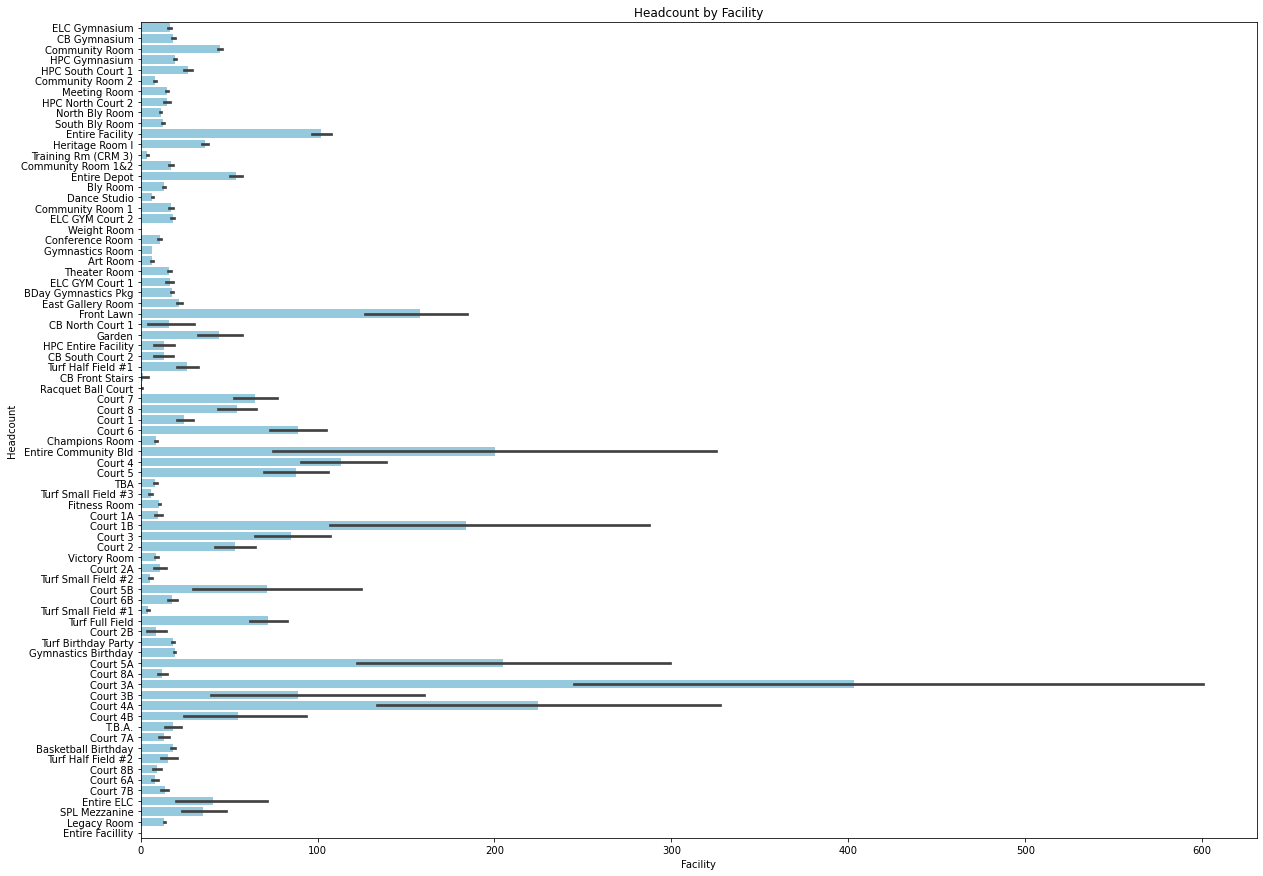

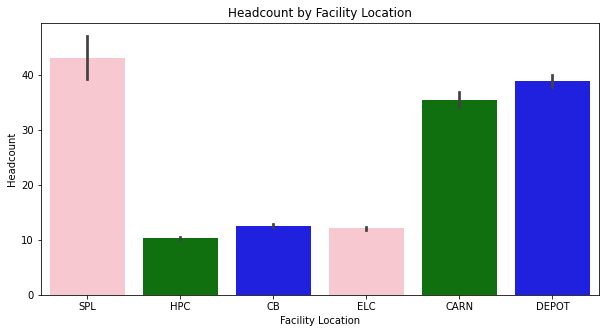

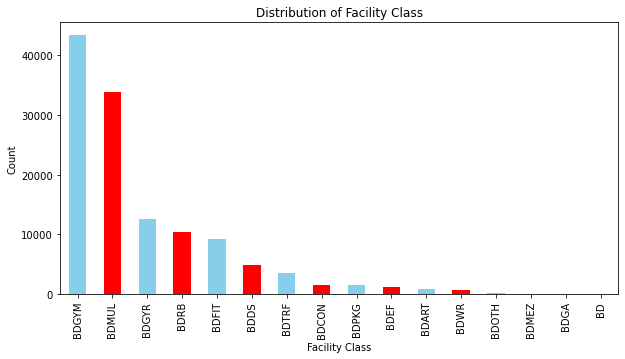

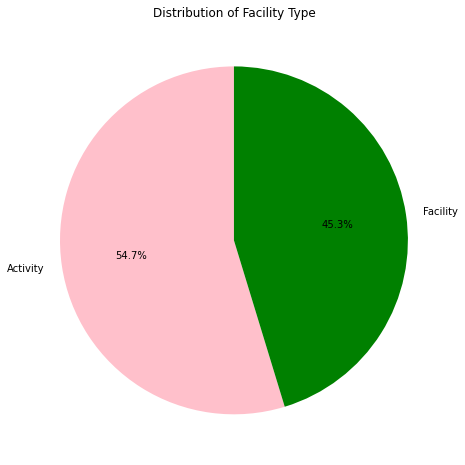

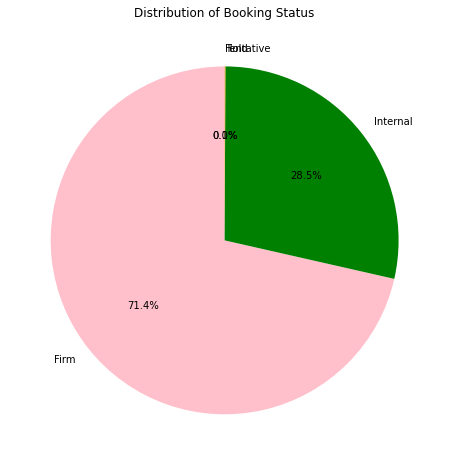

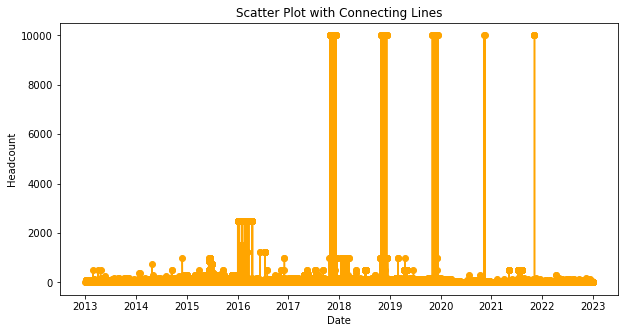

In [50]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

heading = "<h1 style='font-size:24px;'><b>DASHBOARD FOR MULTIPLE BOOKING</b></h1>"
display(HTML(heading))


# Widget for selecting Facility
facility_dropdown = widgets.Dropdown(
    options=['All'] + list(merged_data['Facility'].unique()),
    value='All',
    description='Select Facility:',
)

# Widget for selecting Facility Location
location_dropdown = widgets.Dropdown(
    options=['All'] + list(merged_data['Location'].unique()),
    value='All',
    description='Select Location:',
)

# Widget for selecting Facility Class
class_dropdown = widgets.Dropdown(
    options=['All'] + list(merged_data['Class'].unique()),
    value='All',
    description='Select Facility Class:',
)

# Function to update plots based on widget values
def update_plots(facility, location, facility_class):
    filtered_data = merged_data.copy()

    # Apply filters based on widget values
    if facility != 'All':
        filtered_data = filtered_data[filtered_data['Facility'] == facility]
    if location != 'All':
        filtered_data = filtered_data[filtered_data['Location'] == location]
    if facility_class != 'All':
        filtered_data = filtered_data[filtered_data['Class'] == facility_class]

    # Plot Headcount by Facility
    plt.figure(figsize=(20, 15))
    sns.barplot(y='Facility', x='Headcount', data=filtered_data, color='skyblue')
    plt.title('Headcount by Facility')
    plt.xlabel('Facility')
    plt.ylabel('Headcount')
    plt.show()

    # Plot Headcount by Facility Location
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Location', y='Headcount', data=filtered_data,
                order=filtered_data['Location'].value_counts().index,
                palette=['pink', 'green', 'blue'])
    plt.title('Headcount by Facility Location')
    plt.xlabel('Facility Location')
    plt.ylabel('Headcount')
    plt.show()

    # Plot Distribution of Facility Class
    plt.figure(figsize=(10, 5))
    filtered_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
    plt.title('Distribution of Facility Class')
    plt.xlabel('Facility Class')
    plt.ylabel('Count')
    plt.show()

    # Plot Pie Chart for Facility Type
    plt.figure(figsize=(8, 8))
    filtered_data['ReservationType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                                             colors=['pink', 'green', 'orange', 'blue', 'lightblue'])
    plt.title('Distribution of Facility Type')
    plt.ylabel('')
    plt.show()

    # Plot Pie Chart for Booking Status
    plt.figure(figsize=(8, 8))
    filtered_data['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                                    colors=['pink', 'green', 'orange', 'blue', 'lightblue'])
    plt.title('Distribution of Booking Status')
    plt.ylabel('')
    plt.show()

    # Scatter plot with connecting lines
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Date', y='Headcount', data=filtered_data, color='skyblue')
    plt.plot(filtered_data['Date'], filtered_data['Headcount'], marker='o', linestyle='-', color='orange')
    plt.title('Scatter Plot with Connecting Lines')
    plt.xlabel('Date')
    plt.ylabel('Headcount')
    plt.show()

# Define a function to handle widget changes
def on_widget_change(change):
    facility = facility_dropdown.value
    location = location_dropdown.value
    facility_class = class_dropdown.value
    update_plots(facility, location, facility_class)

# Attach function to widget change events
facility_dropdown.observe(on_widget_change, names='value')
location_dropdown.observe(on_widget_change, names='value')
class_dropdown.observe(on_widget_change, names='value')

# Display widgets
display(facility_dropdown, location_dropdown, class_dropdown)

# Initial plot with all data
update_plots('All', 'All', 'All')


Dropdown(description='Select Facility:', options=('All', 'ELC Gymnasium', 'CB Gymnasium', 'Heritage Room l', '…

Dropdown(description='Select Location:', options=('All', 'ELC', 'CB', 'CARN', 'HPC', 'SPL', 'DEPOT'), value='A…

Dropdown(description='Select Facility Class:', options=('All', 'BDGYM', 'BDMUL', 'BDEF', 'BDCON', 'BDDS', 'BDA…

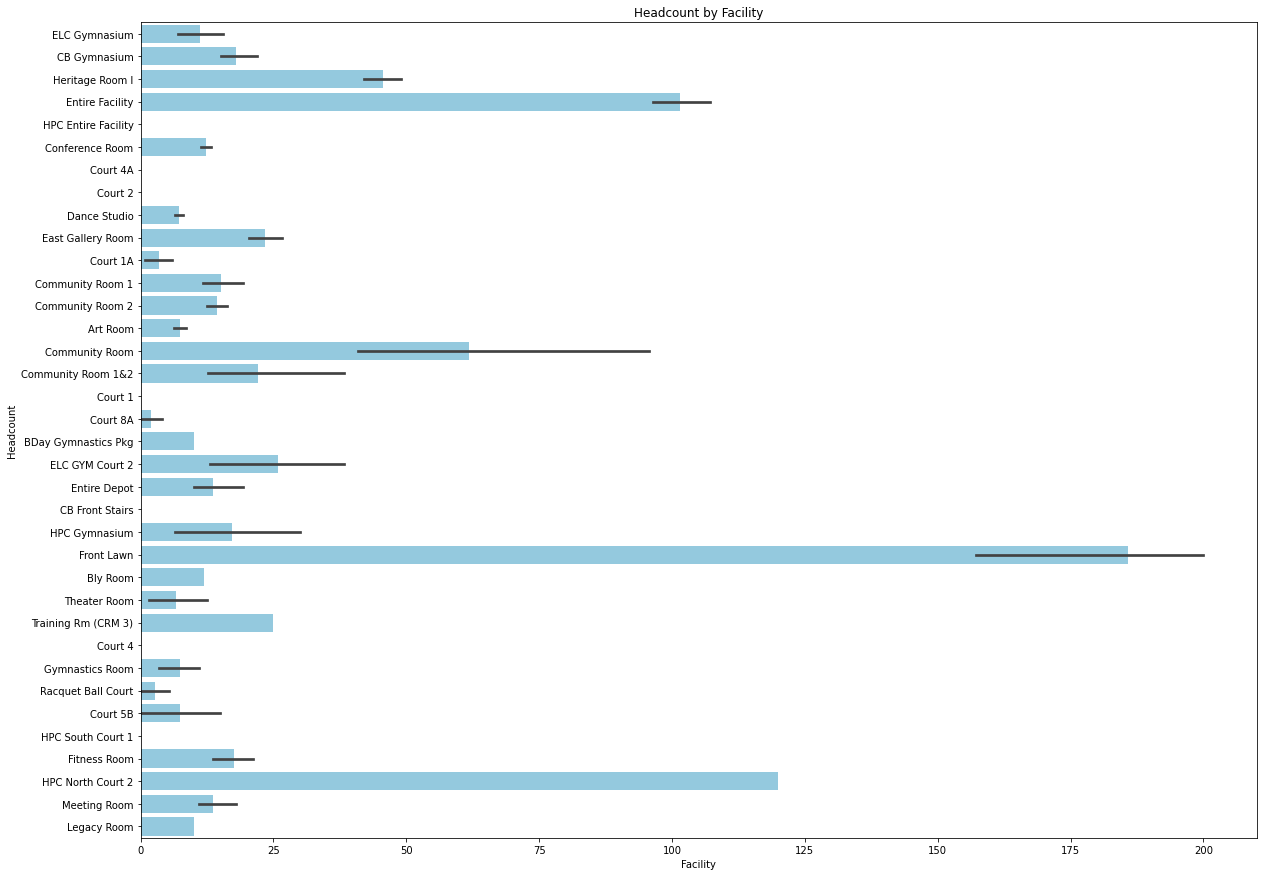

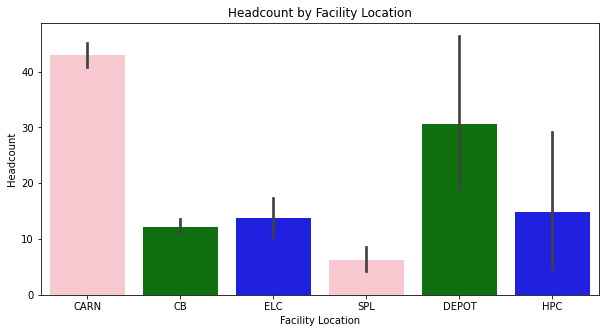

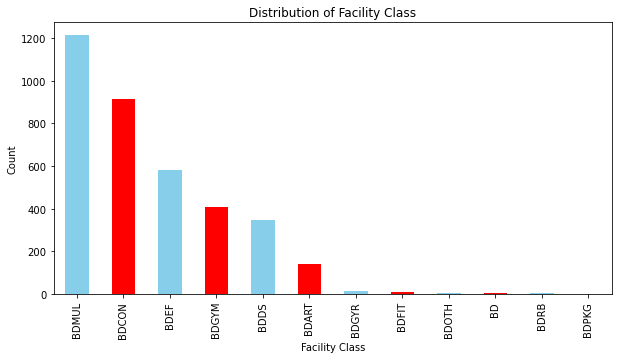

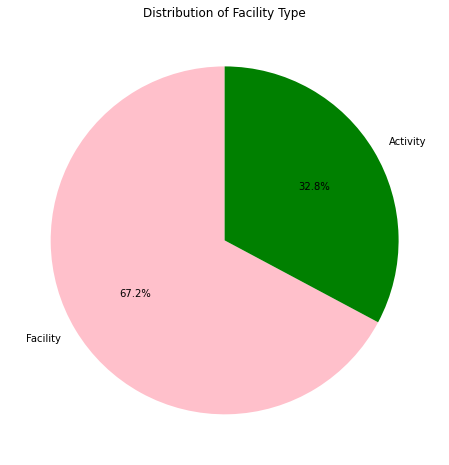

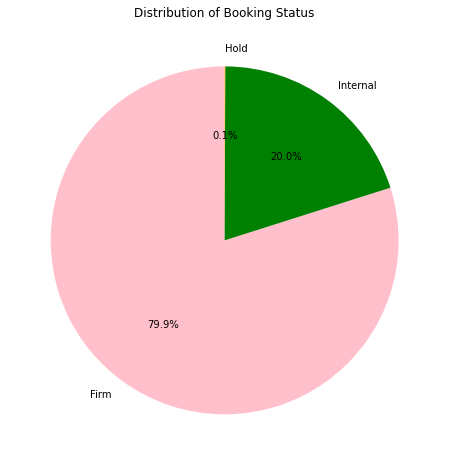

In [51]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython.display import HTML

heading = "<h1 style='font-size:24px;'><b>DASHBOARD FOR SINGLE BOOKING</b></h1>"
display(HTML(heading))


# Widget for selecting Facility
facility_dropdown = widgets.Dropdown(
    options=['All'] + list(Single_Booking['Facility'].unique()),
    value='All',
    description='Select Facility:',
)

# Widget for selecting Facility Location
location_dropdown = widgets.Dropdown(
    options=['All'] + list(Single_Booking['Location'].unique()),
    value='All',
    description='Select Location:',
)

# Widget for selecting Facility Class
class_dropdown = widgets.Dropdown(
    options=['All'] + list(Single_Booking['Class'].unique()),
    value='All',
    description='Select Facility Class:',
)

# Function to update plots based on widget values
def update_plots(facility, location, facility_class):
    filtered_data = Single_Booking.copy()

    # Apply filters based on widget values
    if facility != 'All':
        filtered_data = filtered_data[filtered_data['Facility'] == facility]
    if location != 'All':
        filtered_data = filtered_data[filtered_data['Location'] == location]
    if facility_class != 'All':
        filtered_data = filtered_data[filtered_data['Class'] == facility_class]

    # Plot Headcount by Facility
    plt.figure(figsize=(20, 15))
    sns.barplot(y='Facility', x='Headcount', data=filtered_data, color='skyblue')
    plt.title('Headcount by Facility')
    plt.xlabel('Facility')
    plt.ylabel('Headcount')
    plt.show()

    # Plot Headcount by Facility Location
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Location', y='Headcount', data=filtered_data,
                order=filtered_data['Location'].value_counts().index,
                palette=['pink', 'green', 'blue'])
    plt.title('Headcount by Facility Location')
    plt.xlabel('Facility Location')
    plt.ylabel('Headcount')
    plt.show()

    # Plot Distribution of Facility Class
    plt.figure(figsize=(10, 5))
    filtered_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
    plt.title('Distribution of Facility Class')
    plt.xlabel('Facility Class')
    plt.ylabel('Count')
    plt.show()

    # Plot Pie Chart for Facility Type
    plt.figure(figsize=(8, 8))
    filtered_data['ReservationType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                                             colors=['pink', 'green', 'orange', 'blue', 'lightblue'])
    plt.title('Distribution of Facility Type')
    plt.ylabel('')
    plt.show()

    # Plot Pie Chart for Booking Status
    plt.figure(figsize=(8, 8))
    filtered_data['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                                    colors=['pink', 'green', 'orange', 'blue', 'lightblue'])
    plt.title('Distribution of Booking Status')
    plt.ylabel('')
    plt.show()

# Define a function to handle widget changes
def on_widget_change(change):
    facility = facility_dropdown.value
    location = location_dropdown.value
    facility_class = class_dropdown.value
    update_plots(facility, location, facility_class)

# Attach function to widget change events
facility_dropdown.observe(on_widget_change, names='value')
location_dropdown.observe(on_widget_change, names='value')
class_dropdown.observe(on_widget_change, names='value')

# Display widgets
display(facility_dropdown, location_dropdown, class_dropdown)

# Initial plot with all data
update_plots('All', 'All', 'All')
